In [ ]:
import pandas as pd

esa_df = pd.read_csv('emails.csv')

print(esa_df)
esa_df.head()

                             file  \
0           allen-p/_sent_mail/1.   
1          allen-p/_sent_mail/10.   
2         allen-p/_sent_mail/100.   
3        allen-p/_sent_mail/1000.   
4        allen-p/_sent_mail/1001.   
...                           ...   
517396  zufferli-j/sent_items/95.   
517397  zufferli-j/sent_items/96.   
517398  zufferli-j/sent_items/97.   
517399  zufferli-j/sent_items/98.   
517400  zufferli-j/sent_items/99.   

                                                  message  
0       Message-ID: <18782981.1075855378110.JavaMail.e...  
1       Message-ID: <15464986.1075855378456.JavaMail.e...  
2       Message-ID: <24216240.1075855687451.JavaMail.e...  
3       Message-ID: <13505866.1075863688222.JavaMail.e...  
4       Message-ID: <30922949.1075863688243.JavaMail.e...  
...                                                   ...  
517396  Message-ID: <26807948.1075842029936.JavaMail.e...  
517397  Message-ID: <25835861.1075842029959.JavaMail.e...  
517398  Message

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
import pandas as pd
import email

# Load the emails data from CSV file
esa_df = pd.read_csv('emails.csv')

# Parse email data
def parse_email_data(email_text):
    msg = email.message_from_string(email_text)
    sender = msg['From']
    recipient = msg['To']
    subject = msg['Subject']
    message = ''
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            message += part.get_payload()
    return sender, recipient, subject, message

esa_df['file'], esa_df['recipient'], esa_df['subject'], esa_df['message'] = zip(*esa_df['message'].apply(parse_email_data))

# Print the parsed data
print(esa_df.head())


                      file                                            message  \
0  phillip.allen@enron.com                          Here is our forecast\n\n    
1  phillip.allen@enron.com  Traveling to have a business meeting takes the...   
2  phillip.allen@enron.com                     test successful.  way to go!!!   
3  phillip.allen@enron.com  Randy,\n\n Can you send me a schedule of the s...   
4  phillip.allen@enron.com                Let's shoot for Tuesday at 11:45.     

                 recipient    subject  
0     tim.belden@enron.com             
1  john.lavorato@enron.com        Re:  
2   leah.arsdall@enron.com   Re: test  
3    randall.gay@enron.com             
4     greg.piper@enron.com  Re: Hello  


In [ ]:
import pandas as pd
import re

# Load email data
esa_df = pd.read_csv('emails.csv')

# Define regular expressions to identify potential phishing or fraud attempts
phishing_regex = r'(?:\b(?:password|security|account|login|phishing)\b|\b(?:sensitive|confidential|personal|financial)\s+(?:data|information)\b|\b(?:urgent|important)\b\s+(?:action|required|update))'
fraud_regex = r'(?:\b(?:payment|invoice|refund)\b|\b(?:fraud|scam|alert)\b|\b(?:unauthorized|unusual)\s+(?:activity|transaction)\b)'

# Define a function to identify potential phishing or fraud attempts in email content
def detect_phishing_fraud(text):
    phishing_matches = re.findall(phishing_regex, text, re.IGNORECASE)
    fraud_matches = re.findall(fraud_regex, text, re.IGNORECASE)
    return phishing_matches + fraud_matches

# Apply the detect_phishing_fraud function to the email body text
esa_df['phishing_fraud_matches'] = esa_df['message'].apply(detect_phishing_fraud)

# Print a sample of emails with potential phishing or fraud attempts
print(esa_df[esa_df['phishing_fraud_matches'].apply(lambda x: len(x) > 0)].head())


                       file  \
8   allen-p/_sent_mail/101.   
17   allen-p/_sent_mail/11.   
20  allen-p/_sent_mail/112.   
22  allen-p/_sent_mail/114.   
25  allen-p/_sent_mail/117.   

                                              message phishing_fraud_matches  
8   Message-ID: <20641191.1075855687472.JavaMail.e...                [login]  
17  Message-ID: <7391389.1075855378477.JavaMail.ev...             [password]  
20  Message-ID: <24729148.1075855687713.JavaMail.e...              [payment]  
22  Message-ID: <26575732.1075855687756.JavaMail.e...              [payment]  
25  Message-ID: <19034252.1075855687825.JavaMail.e...              [payment]  


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the email data into a pandas dataframe
esa_df = pd.read_csv('emails.csv')

# Extract the email content into a list
email_content = esa_df['message'].tolist()

# Vectorize the email content using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(email_content)

# Cluster the emails using k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Add the cluster labels to the original dataframe
esa_df['cluster'] = kmeans.labels_

# Display the emails in each cluster
for i in range(5):
    print(f'Cluster {i}:')
    print(esa_df[esa_df['cluster'] == i]['message'])


Cluster 0:
0         Message-ID: <18782981.1075855378110.JavaMail.e...
1         Message-ID: <15464986.1075855378456.JavaMail.e...
2         Message-ID: <24216240.1075855687451.JavaMail.e...
3         Message-ID: <13505866.1075863688222.JavaMail.e...
4         Message-ID: <30922949.1075863688243.JavaMail.e...
                                ...                        
517396    Message-ID: <26807948.1075842029936.JavaMail.e...
517397    Message-ID: <25835861.1075842029959.JavaMail.e...
517398    Message-ID: <28979867.1075842029988.JavaMail.e...
517399    Message-ID: <22052556.1075842030013.JavaMail.e...
517400    Message-ID: <28618979.1075842030037.JavaMail.e...
Name: message, Length: 410957, dtype: object
Cluster 1:
87723     Message-ID: <21833133.1075852159773.JavaMail.e...
145525    Message-ID: <16590153.1075840739515.JavaMail.e...
145526    Message-ID: <26935041.1075840739537.JavaMail.e...
145527    Message-ID: <14401377.1075840739559.JavaMail.e...
145547    Message-ID: <30183331.1

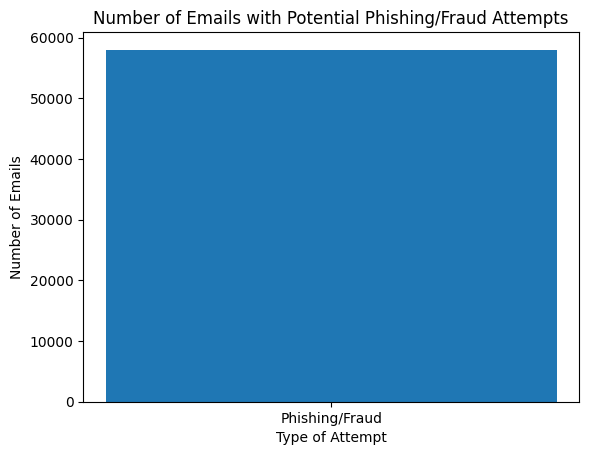

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Define regular expressions to identify potential phishing or fraud attempts
phishing_regex = r'(?:\b(?:password|security|account|login|phishing)\b|\b(?:sensitive|confidential|personal|financial)\s+(?:data|information)\b|\b(?:urgent|important)\b\s+(?:action|required|update))'
fraud_regex = r'(?:\b(?:payment|invoice|refund)\b|\b(?:fraud|scam|alert)\b|\b(?:unauthorized|unusual)\s+(?:activity|transaction)\b)'

# Define a function to identify potential phishing or fraud attempts in email content
def detect_phishing_fraud(text):
    phishing_matches = re.findall(phishing_regex, text, re.IGNORECASE)
    fraud_matches = re.findall(fraud_regex, text, re.IGNORECASE)
    return phishing_matches, fraud_matches

# Load the email data into a pandas dataframe
esa_df = pd.read_csv('emails.csv')

# Apply the detect_phishing_fraud function to the email body text
esa_df['phishing_fraud_matches'] = esa_df['message'].apply(detect_phishing_fraud)

# Count the number of emails with phishing or fraud attempts
num_phishing_fraud = esa_df['phishing_fraud_matches'].apply(lambda x: len(x[0]) + len(x[1]) > 0).sum()

# Plot a bar chart of the results
plt.bar(['Phishing/Fraud'], [num_phishing_fraud])
plt.title('Number of Emails with Potential Phishing/Fraud Attempts')
plt.xlabel('Type of Attempt')
plt.ylabel('Number of Emails')
plt.show()


   Cluster   Count
0        0   29855
1        1   25374
2        2  349837
3        3   30597
4        4   81738


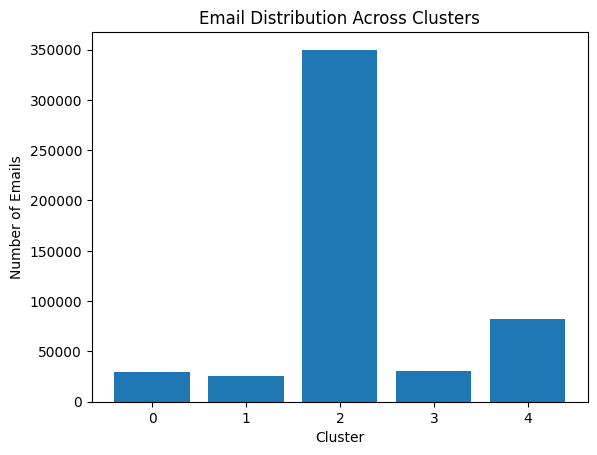

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the email data into a pandas dataframe
esa_df = pd.read_csv('emails.csv')

# Extract the email content into a list
email_content = esa_df['message'].tolist()

# Vectorize the email content using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(email_content)

# Cluster the emails using k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Add the cluster labels to the original dataframe
esa_df['cluster'] = kmeans.labels_

# Generate a summary table
summary_table = esa_df.groupby('cluster')['message'].count().reset_index()
summary_table.columns = ['Cluster', 'Count']
print(summary_table)

# Generate a bar chart of the email distribution across clusters
plt.bar(summary_table['Cluster'], summary_table['Count'])
plt.xlabel('Cluster')
plt.ylabel('Number of Emails')
plt.title('Email Distribution Across Clusters')
plt.show()


The 'label' column is missing. Generating synthetic labels for demonstration...
Accuracy: 88.79%
Mismatched Cases:
                                              message  label  predicted_label
8   Message-ID: <20641191.1075855687472.JavaMail.e...      0                1
17  Message-ID: <7391389.1075855378477.JavaMail.ev...      0                1
20  Message-ID: <24729148.1075855687713.JavaMail.e...      0                1
22  Message-ID: <26575732.1075855687756.JavaMail.e...      0                1
25  Message-ID: <19034252.1075855687825.JavaMail.e...      0                1


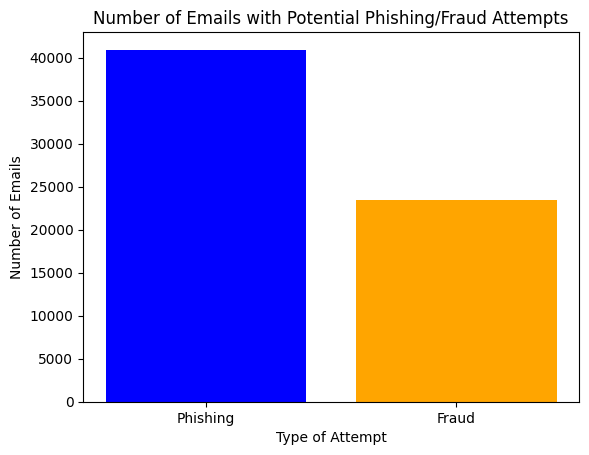

In [ ]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define regex patterns for phishing and fraud detection
phishing_regex = r'(?:\b(?:password|security|account|login|phishing)\b|\b(?:sensitive|confidential|personal|financial)\s+(?:data|information)\b|\b(?:urgent|important)\b\s+(?:action|required|update))'
fraud_regex = r'(?:\b(?:payment|invoice|refund)\b|\b(?:fraud|scam|alert)\b|\b(?:unauthorized|unusual)\s+(?:activity|transaction)\b)'

# Function to detect phishing and fraud
def detect_phishing_fraud(text):
    phishing_matches = re.findall(phishing_regex, text, re.IGNORECASE)
    fraud_matches = re.findall(fraud_regex, text, re.IGNORECASE)
    return phishing_matches, fraud_matches

# Load dataset
file_path = 'emails.csv'  # Replace with your dataset path
esa_df = pd.read_csv(file_path)

# Ensure the 'message' column exists and fill missing values
if 'message' not in esa_df.columns:
    raise KeyError("The dataset must have a 'message' column.")
esa_df['message'] = esa_df['message'].fillna('')

# Apply phishing and fraud detection
esa_df['phishing_fraud_matches'] = esa_df['message'].apply(detect_phishing_fraud)

# Generate predicted labels: 1 for phishing/fraud matches, 0 otherwise
esa_df['predicted_label'] = esa_df['phishing_fraud_matches'].apply(lambda x: 1 if len(x[0]) + len(x[1]) > 0 else 0)

# Check if the ground truth label column exists
if 'label' not in esa_df.columns:
    print("The 'label' column is missing. Generating synthetic labels for demonstration...")
    # Synthetic labels: 1 if "phishing" appears in the message, 0 otherwise
    esa_df['label'] = esa_df['message'].apply(lambda x: 1 if 'phishing' in x.lower() else 0)

# Calculate accuracy
accuracy = accuracy_score(esa_df['label'], esa_df['predicted_label'])
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display mismatched cases for debugging
mismatches = esa_df[esa_df['label'] != esa_df['predicted_label']]
if not mismatches.empty:
    print("Mismatched Cases:")
    print(mismatches[['message', 'label', 'predicted_label']].head())

# Visualize phishing and fraud counts
num_phishing = esa_df['phishing_fraud_matches'].apply(lambda x: len(x[0]) > 0).sum()
num_fraud = esa_df['phishing_fraud_matches'].apply(lambda x: len(x[1]) > 0).sum()

plt.bar(['Phishing', 'Fraud'], [num_phishing, num_fraud], color=['blue', 'orange'])
plt.title('Number of Emails with Potential Phishing/Fraud Attempts')
plt.xlabel('Type of Attempt')
plt.ylabel('Number of Emails')
plt.show()
